### Hector Daniel Juarez Leonel
# Agrupamiento jerárquico

El agrupamiento jerárquico (Hierarchy Clustering) se puede ver como una mejora al algoritmo k-means, ya que permite establecer como su nombre lo dice, una jerarquia, por ejemplo, los animales domésticos se pueden agrupar en perros y gatos, a su vez, los perros se pueden agrupar en las razas, lo cual se puede hacer tambien con los gatos.
<ul>
    <li>Animales domésticos</li>
    <ul>
        <li>perros</li>
        <ul>
            <li>Pastor alemán</li>
            <li>Bulldog</li>
            <li>Poodle</li>
            <li>Labrador</li>
            <li>Schnauzer</li>
        </ul>
    </ul>
    <ul>
        <li>gatos</li>
        <ul>
            <li>Persa</li>
            <li>Siamés</li>
            <li>Sphynx</li>
            <li>Ragdoll</li>
        </ul>
    </ul>
</ul>

Al usar una estructura jerárquica se pueden demostrar relaciones anidadas.

Pasos para realizar un agrupamiento jerárquico:
<ol>
    <li>Dado unna muestra de n puntos, ver cada punto como un cluster individual con solo un punto como miembro</li>
    <li>Calcular la distancia euclidiana por pares entre los centroides de todos los clusters de la muestra</li>
    <li>Agrupar los pares de puntos más cercanos</li>
    <li>Repetir el paso 1 y 2 hasta alcanzar un solo cluster que contenga todos los datos de la muestra</li>
    <li>Graficar un dendrograma para mostrar como los datos se han agrupado en una estructura jerárquica. Un dendograma es un simple diagrama que es usado para representar una estructura de arbol, mostrando el arreglo de los clusters de arriba a abajo</li>
    <li>Decidir a que nivel se desean crear los clusters</li>
    
</ol>

## A continuación, se muestra el ejercicio 7 del libro.

In [15]:
"""
Se cargan las librerias de sklearn las cuales ya tienen implementados
los algoritmos
"""
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
%matplotlib inline
# Genera un dataset de manera aleatoria, con centers se establece el número de clusters 
#que se desean generar. Para que sea 2D se establece n_features=2
X, _ = make_blobs(n_samples=1000, centers=8, n_features=2, random_state=800)
X

array([[ 8.45618926,  5.16692477],
       [ 1.89340502, -8.20687391],
       [ 7.94572745,  4.00351859],
       ...,
       [-2.43862864, -6.31638455],
       [-1.45802863, -1.60201709],
       [-5.26339847,  6.17524253]])

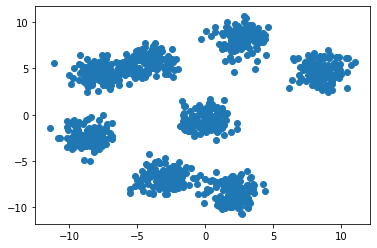

In [16]:
"""
Grafica los puntos generados
"""
plt.scatter(X[:,0], X[:,1])
plt.show()

In [17]:
# Genera una matriz de distancias con la funcion linkage
distances = linkage(X, method="centroid", metric="euclidean")
print(distances)
#Las primeras 2 columnas representan los clusters y la tercera es la distancia entre los clusters, 
#la cuarta columna representa el numero de observaciones del nuevo formado lcuster

[[5.72000000e+02 7.62000000e+02 7.69412624e-03 2.00000000e+00]
 [3.00000000e+01 1.96000000e+02 8.87881891e-03 2.00000000e+00]
 [5.91000000e+02 8.70000000e+02 1.07476240e-02 2.00000000e+00]
 ...
 [1.98900000e+03 1.99200000e+03 7.81168528e+00 3.75000000e+02]
 [1.99500000e+03 1.99600000e+03 1.02408477e+01 7.50000000e+02]
 [1.99400000e+03 1.99700000e+03 1.20025814e+01 1.00000000e+03]]


In [19]:
distances.shape

(999, 4)

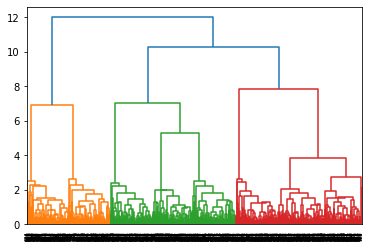

In [18]:
#Grafica el dendrograma de las distancias, aqui se puede observar que los datos 
#se pueden agrupar en distintas categorias según la altura del dendograma
dn = dendrogram(distances)
plt.show()

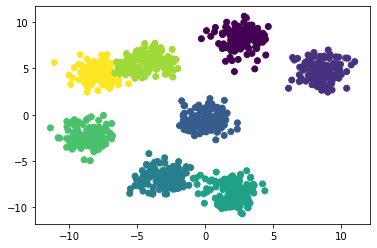

In [5]:
#Realiza el agrupamiento según el criterio dado, en este caso es a aquellos con una distancia menor a 3
scipy_clusters = fcluster(distances, 3, criterion="distance")
plt.scatter(X[:,0], X[:,1], c=scipy_clusters)
plt.show()

# Conclusión

Este algoritmo es muy bueno porque te permite ver los distintos posibles agrupamientos, es decir, en este caso se sabe desde el principio que hay 8 clusters, pero sin ese dato, podria pensar que hay solo 6 o 7 clusters, pues los dos que se visualizan en la parte superior izquierda parecen un solo cluster, lo mismo pasa con los de la parte inferior, o cual se tambien aprecia en el dendrograma.

Un punto negativo de este algoritmo es que es muy pesado computacionalmente, desde la manera en la que se plantea se nota, pues realiza muchas iteraciones, es decir, en k-means se van formando poco a poco los agrupamientos, pero en este se generan muchos agrupamientos los cuales poco a poco se van generalizando.